In [39]:
import numpy as np
import matplotlib.pyplot as plt
from navtools.dsp import upsample_sequence, carrier_replica

## Sequence Replicas
Parameters includes # of replication periods, absolute start time, replication period duration, sampling frequency, chipping frequency, chipping frequency ramp interval, and sequence length.


In [40]:
nperiods = 5
start_time = 0 # [s]
iperiod = 1.0 # [s]
fsamp = 100 # [Hz]
fchip = 20.12 # [Hz]
fchip_ramp = 0 # [Hz]
sequence_length = 10

In [41]:
sequence = 2 * np.random.randint(0, 2, sequence_length) - 1  # non-return to zero
nsamples = iperiod * fsamp
phase_shift = 2
start_phase = 0.0

replicas = []
times = []
for _ in range(nperiods):
    time = np.arange(0,nsamples) * (1/fsamp) + start_time
    start_time = time[-1] + (1/fsamp)
    
    replica = upsample_sequence(
        sequence=sequence,
        nsamples=nsamples,
        fsamp=fsamp,
        fchip=fchip,
        phase_shift=phase_shift,
        start_phase=start_phase,
    )
    delta_phase = fchip / fsamp
    start_phase = (start_phase + nsamples * delta_phase) % sequence_length

    fchip += fchip_ramp
    
    replicas.append(replica)
    times.append(time)

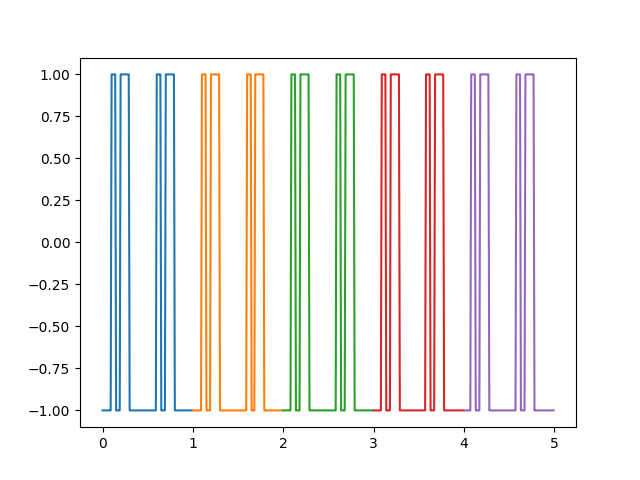

In [42]:
_, sequence_ax = plt.subplots()
for time, replica in zip(times, replicas):
    sequence_ax.plot(time, replica)
%matplotlib widget
# plt.show()

## Carrier Replicas
Parameters includes # of replication periods, absolute start time, replication period duration, sampling frequency, and carrier frequency.

In [43]:
nperiods = 5
start_time = 0 # [s]
iperiod = 1.2 # [s]
fsamp = 500 # [Hz]
fcarrier = 5 # [Hz]
fcarrier_ramp = -1 #[Hz]

In [44]:
nsamples = iperiod * fsamp
start_phase = 0.0

replicas = []
times = []
for _ in range(nperiods):
    time = np.arange(0,nsamples) * (1/fsamp) + start_time
    start_time = time[-1] + (1/fsamp)
    
    replica = carrier_replica(
        fcarrier=fcarrier,
        nsamples=nsamples,
        fsamp=fsamp,
        start_phase=start_phase,
    )
    delta_phase = fcarrier / fsamp 
    start_phase = (start_phase + nsamples * delta_phase) % 1
    
    fcarrier += fcarrier_ramp

    replicas.append(replica)
    times.append(time)

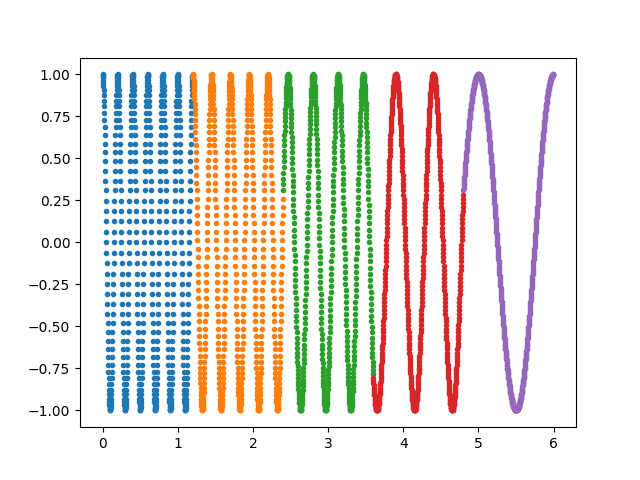

In [45]:
_, carrier_ax = plt.subplots()
for time, replica in zip(times, replicas):
    carrier_ax.plot(time, np.real(replica), '.')
    
plt.show()